<a href="https://colab.research.google.com/github/ttogle918/ds-section2-sprint2/blob/main/n222-random-forests/n222a-random-forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 2 / NOTE 2*

# 📝 Assignment
---

# 랜덤포레스트(Random Forests)

### 1) 캐글 대회를 이어서 진행합니다. EDA, 데이터 전처리 부분을 업데이트 하세요.
- EDA는 항상 완벽할 수 없지요 한 주간 계속 같은 데이터로 과제를 진행하므로 부족한 부분을 추가하거나 논하세요.
- (지금은 feature engineering에 너무 시간을 들이지 마세요!)
- Ordinal Encoding을 적용해 보세요.
- **(객관식) 다음 특성들 중에 순서를 고려한 Ordinal Encoding이 필요해 보이는 특성을 고르세요.**
    1. opinion_h1n1_vacc_effective
    2. state
    3. marital
    4. employment_occupation


In [3]:
!pip install category_encoders

In [4]:
!pip uninstall pandas_profiling
!pip install pandas_profiling
!pip show pandas_profiling

Found existing installation: pandas-profiling 3.1.0
Uninstalling pandas-profiling-3.1.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? ㅛ
Your response ('ㅛ') was not one of the expected responses: y, n
Proceed (y/n)? ㅛ
Your response ('ㅛ') was not one of the expected responses: y, n
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-3.1.0
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
Name: pandas-profiling
Version: 3.1.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: joblib, pandas, multimethod, pydantic, seaborn, visions, tqdm, htmlmin, jinja2, missingno, scipy, phik, PyYAML, tangled-up-in-unicod

In [5]:
# google 드라이브에 로컬 파일 업로드
from google.colab import files, drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
target = 'vacc_h1n1_f'
train = pd.merge(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code_states/train.csv"),
                 pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code_states/train_labels.csv")[target],
                 left_index=True, right_index=True)
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code_states/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/code_states/submission.csv")

# EDA 진행

#### 중복값 확인

In [7]:
train.T.duplicated() # 중복값 없음.

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_insurance               False
health_worker                  False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
agegrp                         False
education_comp                 False
raceeth4_i                     False
sex_i                          False
inc_pov                        False
marital                        False
r

In [8]:
test.T.duplicated() # 중복값 없음.

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_insurance               False
health_worker                  False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
agegrp                         False
education_comp                 False
raceeth4_i                     False
sex_i                          False
inc_pov                        False
marital                        False
r

#### 결측치(null)값 확인

In [9]:
train.isnull().sum()  # 많다.

h1n1_concern                    8420
h1n1_knowledge                  8420
behavioral_antiviral_meds       8519
behavioral_avoidance            8672
behavioral_face_mask            8444
behavioral_wash_hands           8471
behavioral_large_gatherings     8514
behavioral_outside_home         8521
behavioral_touch_face           8583
doctor_recc_h1n1                1885
doctor_recc_seasonal            1885
chronic_med_condition           1317
child_under_6_months            9449
health_insurance               19421
health_worker                   9430
opinion_h1n1_vacc_effective     8779
opinion_h1n1_risk               8825
opinion_h1n1_sick_from_vacc     8869
opinion_seas_vacc_effective     8934
opinion_seas_risk               9001
opinion_seas_sick_from_vacc     9065
agegrp                             0
education_comp                 10166
raceeth4_i                         0
sex_i                              0
inc_pov                            0
marital                        10199
r

In [10]:
test.isnull().sum()

h1n1_concern                    5612
h1n1_knowledge                  5612
behavioral_antiviral_meds       5672
behavioral_avoidance            5810
behavioral_face_mask            5626
behavioral_wash_hands           5648
behavioral_large_gatherings     5683
behavioral_outside_home         5682
behavioral_touch_face           5720
doctor_recc_h1n1                1207
doctor_recc_seasonal            1207
chronic_med_condition            854
child_under_6_months            6291
health_insurance               12740
health_worker                   6270
opinion_h1n1_vacc_effective     5864
opinion_h1n1_risk               5903
opinion_h1n1_sick_from_vacc     5933
opinion_seas_vacc_effective     5957
opinion_seas_risk               5993
opinion_seas_sick_from_vacc     6035
agegrp                             0
education_comp                  6811
raceeth4_i                         0
sex_i                              0
inc_pov                            0
marital                         6823
r

#### 한 컬럼당 종류(cardinality) 확인
count : 결측치 확인 가능 ( 전체 data수 - count )

unique : cardinality 확인 가능<br><br><br>



결측치 수 많음

1. employment_industry = employment_occupation
3. health_insurance

In [11]:
# cardinality 확인 (one-hot-encording할 때 몇개의 차원이 될지)
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
employment_status,31876,3,Employed,17173
census_msa,42154,3,"MSA, Not Principle City",18957
opinion_h1n1_vacc_effective,33375,6,Somewhat Effective,14729
opinion_h1n1_risk,33329,6,Somewhat Low,12520
opinion_h1n1_sick_from_vacc,33285,6,Not Very Worried,11582
opinion_seas_vacc_effective,33220,6,Somewhat Effective,14543
opinion_seas_risk,33153,6,Somewhat Low,11397
opinion_seas_sick_from_vacc,33089,6,Not At All Worried,14749
agegrp,42154,7,65+ Years,8517
employment_industry,17165,23,Health Care and Social Assistance Industries,3086


### 데이터 분리
feature과 lable 분리

In [12]:
y_train = train[target]
X_train = train.drop(target, axis=1)

X_train.shape, y_train.shape

((42154, 38), (42154,))

#### 데이터 타입이 Object-string 인 데이터 확인

In [13]:
# features- object컬럼의 cardinality확인

# object 타입의 features를 고르기
object_data = []

for col in X_train.columns:
    if X_train[col].dtype=="object":
        object_data.append(col)

object_data

['opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'agegrp',
 'employment_status',
 'census_msa',
 'employment_industry',
 'employment_occupation',
 'state']

In [14]:
X_train[object_data].describe().T.sort_values(by='unique')

,count,unique,top,freq
employment_status,31876,3,Employed,17173
census_msa,42154,3,"MSA, Not Principle City",18957
opinion_h1n1_vacc_effective,33375,6,Somewhat Effective,14729
opinion_h1n1_risk,33329,6,Somewhat Low,12520
opinion_h1n1_sick_from_vacc,33285,6,Not Very Worried,11582
opinion_seas_vacc_effective,33220,6,Somewhat Effective,14543
opinion_seas_risk,33153,6,Somewhat Low,11397
opinion_seas_sick_from_vacc,33089,6,Not At All Worried,14749
agegrp,42154,7,65+ Years,8517
employment_industry,17165,23,Health Care and Social Assistance Industries,3086


#### label 정답 비율 확인 및 시각화

In [15]:
# target - 구성 비율 확인 & 시각화
proportion = pd.DataFrame(y_train.value_counts())
proportion

,vacc_h1n1_f
0,32077
1,10077


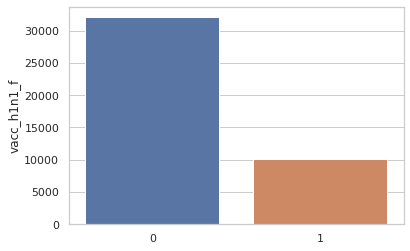

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# 시각화
df_target = pd.DataFrame(y_train)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=proportion.index, y=target, data=proportion)
plt.show()

#### 인코딩 필요 여부 확인

In [17]:
train["opinion_h1n1_vacc_effective"].value_counts()   # Ordinal Encoding이 필요 : 점수로 환산 가능

Somewhat Effective      14729
Very Effective           9052
Dont Know                6033
Not Very Effective       2312
Not At All Effective     1111
Refused                   138
Name: opinion_h1n1_vacc_effective, dtype: int64

In [18]:
train["state"].value_counts()   # 순서에 크게 연연하지 않는다.

NEW MEXICO             1017
TEXAS                  1012
CALIFORNIA              992
VIRGINIA                982
MARYLAND                978
GEORGIA                 963
ILLINOIS                933
DISTRICTOF COLUMBIA     927
MISSISSIPPI             897
UTAH                    894
NEW YORK                892
FLORIDA                 890
ARIZONA                 887
LOUISIANA               884
ALASKA                  876
NEW JERSEY              867
NORTH CAROLINA          860
ALABAMA                 856
COLORADO                850
WASHINGTON              834
NEVADA                  834
ARKANSAS                826
INDIANA                 821
DELAWARE                820
WYOMING                 820
IDAHO                   818
OREGON                  818
NEBRASKA                810
KANSAS                  805
SOUTH CAROLINA          796
MASSACHUSETTS           791
IOWA                    791
OKLAHOMA                783
CONNECTICUT             783
RHODE ISLAND            778
OHIO                

In [19]:
train["marital"].value_counts()   # -> ordinal Encoding이 필요없다.

1.0    17126
2.0    14829
Name: marital, dtype: int64

In [20]:
train["employment_occupation"].value_counts()   # 순서에 크게 연연하지 않는다.

Management Occupations                                       2188
Office and Administrative Support Occupations                1931
Education, Training, and Library Occupations                 1609
Healthcare Practitioners and Technical Occupations           1535
Sales and Related Occupations                                1404
Business and Financial Operations Occupations                 946
Construction and Extraction Occupations                       672
Production Occupations                                        614
Transportation and Material Moving Occupations                612
Computer and Mathematical Occupations                         589
Food Preparation and Serving Related Occupations              523
Arts, Design, Entertainment, Sports and Media Occupations     457
Architecture and Engineering Occupations                      447
Community and Social Services Occupations                     435
Personal Care and Service Occupations                         429
Building a

### Feature Engineering

#### # 1. 지역 관련 컬럼 통합

In [21]:
# hhs_region : U.S. Department of Health & Human Services에서는 관할구역을 지정하고 branch office를 설치하여 관리,감독하고 있다.
# 백신은 보건 관련 정보이므로, hhs_region정보는 살려둔다.

# 1~10까지 있는지 확인
X_train["hhs_region"].value_counts().sort_index(ascending=True)

1     4527
2     1759
3     5178
4     6751
5     4793
6     4522
7     3154
8     4684
9     3440
10    3346
Name: hhs_region, dtype: int64

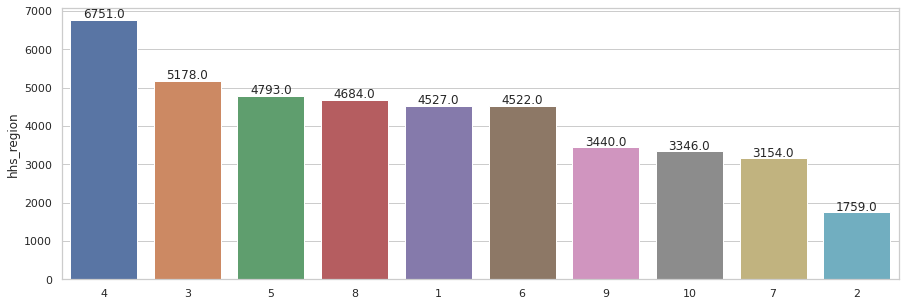

In [22]:
# 어느 지역이 가장 많은지? - 시각화
df_hhs_region = pd.DataFrame(X_train["hhs_region"].value_counts())

sns.set_theme(style="whitegrid")
plt.subplots(figsize=(15, 5))
ax = sns.barplot(x=df_hhs_region.index, y="hhs_region", data=df_hhs_region, order = df_hhs_region.index)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate(p.get_height(), (left+width/2, height*1.01), ha='center')
    
plt.show()

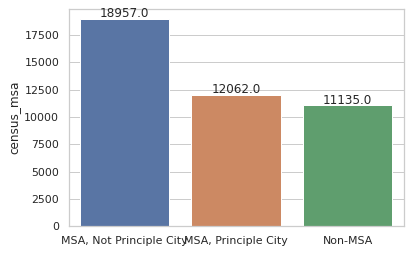

In [23]:
# census_region, census_msa 는 인구 밀도/분포와 관련 되어 있다 -> 지리적 위치가 더 궁금하므로 census_msa를 drop해본다.

# drop전에 - 어떤 모양인가?
df_cencus_msa = pd.DataFrame(X_train["census_msa"].value_counts())

sns.set_theme(style="whitegrid")
ax = sns.barplot(x=df_cencus_msa.index, y="census_msa", data=df_cencus_msa)

for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate(p.get_height(), (left+width/2, height*1.01), ha='center')
    
plt.show()

In [24]:
X_train.drop("census_msa", axis=1, inplace=True)  # 1회만 실행
X_test = test.drop("census_msa", axis=1)   # 1회만 실행
X_test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_insurance,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,agegrp,education_comp,raceeth4_i,sex_i,inc_pov,marital,rent_own_r,employment_status,census_region,n_adult_r,household_children,n_people_r,employment_industry,employment_occupation,hhs_region,state
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Not At All Effective,Very Low,Not At All Worried,Not At All Effective,Very Low,Not At All Worried,18 - 34 Years,1.0,3,2,2,2.0,1.0,Employed,2,2.0,0.0,2.0,Health Care and Social Assistance Industries,Healthcare Practitioners and Technical Occupat...,7,KANSAS
1,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,Dont Know,Dont Know,Dont Know,Dont Know,Dont Know,Dont Know,55 - 64 Years,NaN,3,1,4,NaN,NaN,NaN,3,1.0,0.0,1.0,NaN,NaN,6,LOUISIANA
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,Very Effective,Very Low,Not Very Worried,Very Effective,Somewhat High,Somewhat Worried,65+ Years,3.0,3,1,2,2.0,1.0,Not in Labor Force,1,1.0,0.0,1.0,NaN,NaN,1,NEW HAMPSHIRE
3,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,Very Effective,Somewhat High,Not Very Worried,Very Effective,Somewhat High,Not At All Worried,65+ Years,4.0,3,1,4,1.0,1.0,Not in Labor Force,4,2.0,0.0,2.0,NaN,NaN,9,CALIFORNIA
4,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0,Somewhat Effective,Somewhat Low,Not Very Worried,Somewhat Effective,Somewhat Low,Not At All Worried,65+ Years,2.0,3,1,2,2.0,1.0,Not in Labor Force,1,1.0,0.0,1.0,NaN,NaN,1,NEW HAMPSHIRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28099,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Somewhat Effective,Somewhat Low,Not Very Worried,Very Effective,Somewhat High,Not Very Worried,55 - 64 Years,3.0,3,1,3,2.0,2.0,Not in Labor Force,2,3.0,1.0,4.0,NaN,NaN,7,MISSOURI
28100,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Somewhat Effective,Somewhat Low,Somewhat Worried,Very Effective,Very High,Very Worried,45 - 54 Years,2.0,3,2,2,1.0,1.0,Employed,3,2.0,0.0,2.0,Education Services Industries,"Education, Training, and Library Occupations",4,MISSISSIPPI
28101,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,0.0,Very Effective,Very Low,Not Very Worried,Very Effective,Very Low,Not At All Worried,55 - 64 Years,2.0,3,1,1,1.0,1.0,Not in Labor Force,4,3.0,0.0,3.0,NaN,NaN,9,CALIFORNIA
28102,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Somewhat Effective,Very High,Not At All Worried,Very Effective,Very High,Not At All Worried,35 - 44 Years,3.0,4,2,4,1.0,99.0,Employed,2,2.0,2.0,4.0,Transportation and Warehousing Industries,Office and Administrative Support Occupations,7,NEBRASKA


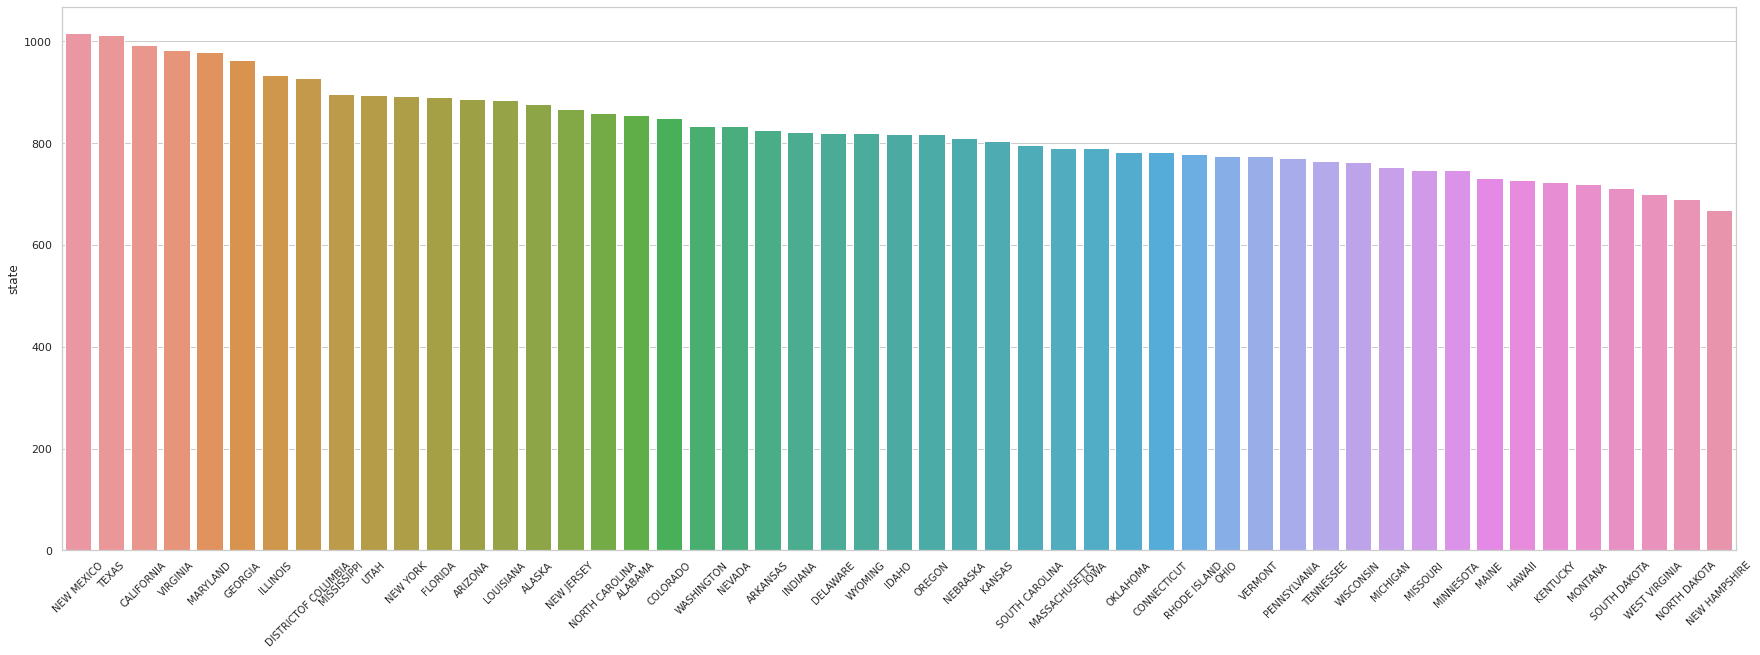

In [25]:
# state - DecisionTree에서는 삭제하였으나, 이번에는 살려서 사용해본다.

# 시각화로 현황 파악#
df_state = pd.DataFrame(X_train["state"].value_counts())

sns.set_theme(style="whitegrid")
plt.subplots(figsize=(30,10))
plt.xticks(rotation = 45, fontweight='light', fontsize='small' )
ax = sns.barplot(x=df_state.index, y="state", data=df_state)

plt.show()

#### 2. 거주 구성원 - 어른 & 아이 확인

In [26]:
X_train[["n_adult_r", "household_children", "n_people_r"]]

,n_adult_r,household_children,n_people_r
0,2.0,3.0,5.0
1,1.0,0.0,1.0
2,1.0,2.0,3.0
3,2.0,2.0,4.0
4,3.0,0.0,3.0
...,...,...,...
42149,2.0,1.0,3.0
42150,2.0,0.0,2.0
42151,2.0,3.0,5.0
42152,2.0,0.0,2.0


In [27]:
# from pandas_profiling import ProfileReport

# ProfileReport(train)

In [28]:
train["opinion_h1n1_risk"].unique()

array([nan, 'Very Low', 'Somewhat Low', 'Refused', 'Somewhat High',
       'Dont Know', 'Very High'], dtype=object)

In [29]:
# 정보 확인
# 어른 인원 + 어린이 인원 = 총 인원.
# 어린이 인원의 비율 컬럼을 만들어보자.
X_train[["n_adult_r", "household_children", "n_people_r"]].describe()

,n_adult_r,household_children,n_people_r
count,41845.000000,41845.000000,42020.000000
mean,1.937460,0.797156,2.738505
std,0.745174,1.039354,1.393333
min,1.000000,0.000000,1.000000
25%,1.000000,0.000000,2.000000
50%,2.000000,0.000000,2.000000
75%,2.000000,2.000000,4.000000
max,4.000000,3.000000,7.000000


In [30]:
# 어린이 인원 수 / 전체 인원수 * 100
X_train["proportion_child"] = round((X_train["household_children"]/X_train["n_people_r"])*100, 0)

# 확인
X_train["proportion_child"].head(10)

0    60.0
1     0.0
2    67.0
3    50.0
4     0.0
5    33.0
6    25.0
7     0.0
8    50.0
9    60.0
Name: proportion_child, dtype: float64

In [31]:
# test에서도 잊지 않고 해 준다.
X_test["proportion_child"] = round((test["household_children"]/test["n_people_r"])*100, 0)

# 확인
X_test["proportion_child"].head(10)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5    50.0
6     0.0
7    50.0
8     0.0
9     0.0
Name: proportion_child, dtype: float64

### 데이터셋 나누기 - 모델 성능 유추를 위해서

In [32]:
from sklearn.model_selection import train_test_split
# 모델 성능 유추를 위한 검증 데이터셋 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = 0)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((33723, 38), (33723,), (8431, 38), (8431,), (28104, 38))

### 2) 랜덤포레스트 모델을 적용한 후의 결과를 캐글에 제출하세요.
- 랜덤포레스트를 적용하고 성능이 오히려 떨어졌을 수도 있습니다! 만약 그렇다면 이유를 본인 논리로 분석해 보세요.
- **캐글 Leaderboard의 본인 Score를 제출하세요.**

In [33]:
# 특성별로 인코더를 따로 정해 주고 싶었기 때문에, 특성 이름을 모아 리스트로 설정

# onehot 할 특성
onehot = ['sex_i','agegrp','raceeth4_i','marital','rent_own_r','employment_status',
          'census_region','hhs_region', 'state','employment_industry','employment_occupation','education_comp']

# ordinal 할 특성
ordinal = ['opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc',
           'opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc']

In [34]:
# from sklearn.metrics import accuracy_score

# major = y_train.mode()[0]
# basic_model = [major] * len(y_train)
# print("기준모델과 훈련용 데이터 학습 정확도 :", accuracy_score(y_train, basic_model))

In [35]:
# y_pred_val = [major] * len(y_val)

# print("기준모델과 검증용 데이터 학습 정확도 :", accuracy_score(y_val, y_pred_val))

In [36]:
# %%time
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# ordinal encoding
pipe_onehot = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(random_state=10, n_jobs=-1, oob_score=True)
)

pipe_onehot.fit(X_train, y_train)
print('훈련 정확도: ', pipe_onehot.score(X_train, y_train))
print('검증 정확도', pipe_onehot.score(X_val, y_val))

from sklearn.metrics import f1_score
# 검증세트로 평가
y_pred_val = pipe_onehot.predict(X_val)
print('검증 f1 score: ', f1_score(y_val, y_pred_val))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


훈련 정확도:  0.9949589301070486
검증 정확도 0.8246945795279327
검증 f1 score:  0.5482885085574573


In [37]:
pipe_onehot.named_steps['randomforestclassifier'].oob_score_

0.8217240459033894

In [38]:
# 2. 모든 특성을 일괄적으로 OrdinalEncoding
pipe_ord = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe_ord.fit(X_train, y_train)
print('훈련 정확도: ', pipe_ord.score(X_train, y_train))
print('검증 정확도', pipe_ord.score(X_val, y_val))

from sklearn.metrics import f1_score
# 검증세트로 평가
y_pred_val = pipe_ord.predict(X_val)
print('검증 f1 score: ', f1_score(y_val, y_pred_val))

훈련 정확도:  0.9949589301070486
검증 정확도 0.8249317993120626
검증 f1 score:  0.5599284436493739


In [39]:
pipe_ord.named_steps['randomforestclassifier'].oob_score_

0.8219019660172583

In [40]:
# 3. 모든 특성을 일괄적으로 OrdinalEncoding > SimpleImputer > RandomForestClassifier parameter 추가 설정
pipe_ord_para = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, n_estimators = 200, min_samples_split = 12)
)

pipe_ord_para.fit(X_train, y_train)
print('검증 정확도: ', pipe_ord_para.score(X_val, y_val))

y_pred3 = pipe_ord_para.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred3))

검증 정확도:  0.8308622939153125
검증 f1:  0.5689238210399032


In [41]:
pipe_ord_para.named_steps['randomforestclassifier'].oob_score_

0.8275361029564392

In [42]:
# 4. 일부 특성 OneHot > 일부 특성 Ordinal > SimpleImputer > RandomForestClassifier
pipe4 = make_pipeline(
    OneHotEncoder(use_cat_names=True, cols=onehot), 
    OrdinalEncoder(cols=ordinal),
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True)
)

pipe4.fit(X_train, y_train)
print('검증 정확도: ', pipe4.score(X_val, y_val))

y_pred4 = pipe4.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred4))

검증 정확도:  0.8155616178389278
검증 f1:  0.5139105970615818


In [43]:
# 5. 일부 특성 OneHot > 일부 특성 Ordinal > SimpleImputer > RandomForestClassifier parameter 추가 설정
pipe4 = make_pipeline(
    OneHotEncoder(use_cat_names=True, cols=onehot), 
    OrdinalEncoder(cols=ordinal),
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, n_estimators = 200, min_samples_split = 12)
)

pipe4.fit(X_train, y_train)
print('검증 정확도: ', pipe4.score(X_val, y_val))

y_pred4 = pipe4.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred4))

검증 정확도:  0.8248131894199976
검증 f1:  0.5342163355408388


In [44]:
# 6. 일부 특성 OneHot > 일부 특성 Ordinal > SimpleImputer > RandomForestClassifier parameter 추가 설정
pipe4 = make_pipeline(
    OneHotEncoder(use_cat_names=True, cols=onehot), 
    OrdinalEncoder(cols=ordinal),
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=10, oob_score=True, n_estimators = 150, min_samples_split = 6)
)

pipe4.fit(X_train, y_train)
print('검증 정확도: ', pipe4.score(X_val, y_val))

y_pred4 = pipe4.predict(X_val)
print('검증 f1: ', f1_score(y_val, y_pred4))

검증 정확도:  0.8237457003914126
검증 f1:  0.5341692789968652


### 가장 좋은 결과로 저장

In [47]:
y_pred = pipe_ord_para.predict(X_train)
print('predict 전 test 정확도: ', pipe_ord_para.score(X_test, submission['vacc_h1n1_f']))

from sklearn.metrics import f1_score

print('test f1 score: ', f1_score(y_train, y_pred))

predict 전 test 정확도:  0.502134927412468
test f1 score:  0.7661466686105846


In [48]:
enc = pipe_ord_para.named_steps['ordinalencoder']
encoded = enc.transform(X_train)

print('Ordinal  shape: ', encoded.shape)

Ordinal  shape:  (33723, 38)


In [49]:
y_pred = pipe_ord_para.predict(X_test)

submission['vacc_h1n1_f'] = y_pred
submission.to_csv('n222_zena_choi.csv', index=False)

## 🔥 도전과제

### 3) 수업에 사용하지 않은 다른 종류의 [category_encoders](http://contrib.scikit-learn.org/category_encoders/)을 적용해 보고 인코더에 대해 설명하세요


In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

## 참고자료

- [Random Forests for Complete Beginners](https://victorzhou.com/blog/intro-to-random-forests/)